In [1]:
import matplotlib.pyplot as plt
import os 
import pandas as pd

In [2]:
cifdir = 'cifdirs/pcod_new_10000'
target_dir = 'result/cifdirs/pcod_new_10000'
#target_enegy =  'Total GULP energy'
target_enegy =  'GULP energy per Si atom'

In [3]:
# Read cifpoint
dca_point_df = pd.read_csv(os.path.join(target_dir, 'cifpoint')).astype({'cifid':str})
# Get energy and volume
cif_energy_dict = {}
for i in range(len(dca_point_df)):
    cifid = dca_point_df.iloc[i]['cifid']
    path = os.path.join(cifdir, f'{cifid}.cif')
    for text in open(path, 'r').readlines():
        if target_enegy in text:
            cif_energy_dict[cifid] = float(text.split()[-2])
            break
cif_energy_df = pd.DataFrame.from_dict(cif_energy_dict, orient='index', columns=[target_enegy]).reset_index().rename(columns={'index':'cifid'})
# Merge
cif_energy_df = cif_energy_df.merge(dca_point_df, on='cifid')

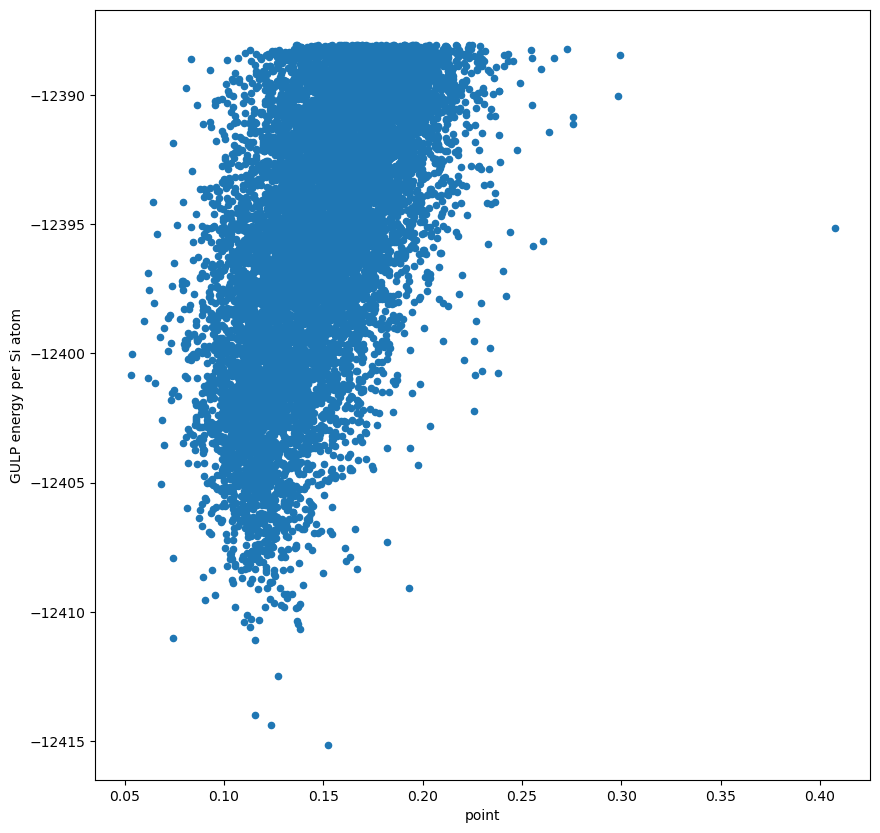

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
cif_energy_df.plot.scatter(x = 'point', y = target_enegy,ax=ax)
plt.show()